references:
https://www.kaggle.com/code/vinayak123tyagi/damage-propagation-modeling-for-aircraft-engine

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
fd_001_train = pd.read_csv(r"C:\Users\User\Desktop\CMAPS_turbo_engine_RUL\CMAPSSData\train_FD001.txt",sep=" ",header=None)
fd_001_test = pd.read_csv(r"C:\Users\User\Desktop\CMAPS_turbo_engine_RUL\CMAPSSData\test_FD001.txt",sep=" ",header=None)

In [32]:
fd_001_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000,0.0,0.0
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705,NaN,NaN
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251,NaN,NaN
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200,NaN,NaN
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800,NaN,NaN
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900,NaN,NaN
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800,NaN,NaN
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400,NaN,NaN


In [36]:
fd_001_train.drop(columns=[26,27],inplace=True)
fd_001_test.drop(columns=[26,27],inplace=True)

In [38]:
columns = ['unit_number','time_in_cycles','setting_1','setting_2','TRA','T2','T24','T30','T50','P2','P15','P30','Nf',
           'Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32' ]

fd_001_train.columns = columns
fd_001_test.columns = columns

fd_001_train

,unit_number,time_in_cycles,setting_1,setting_2,TRA,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


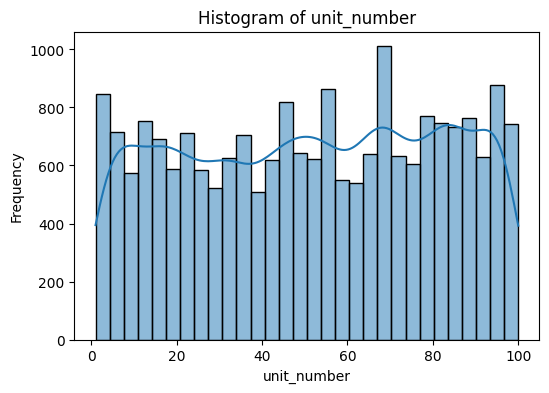

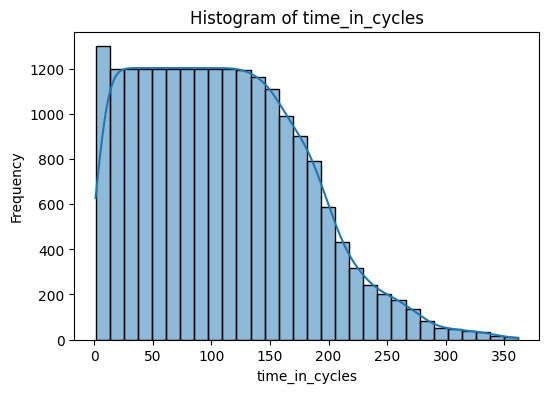

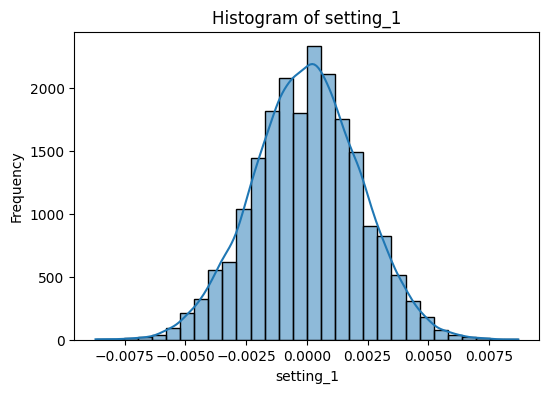

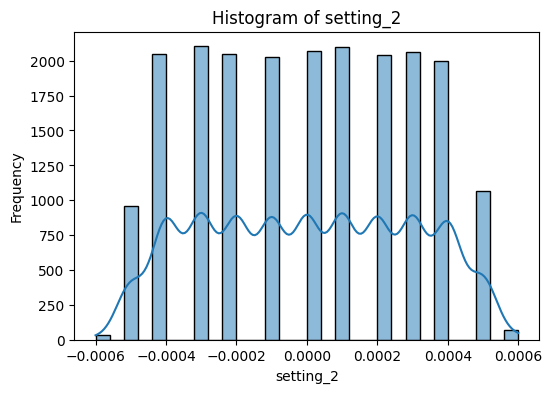

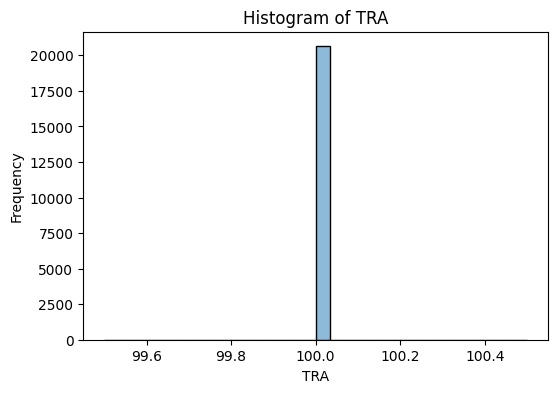

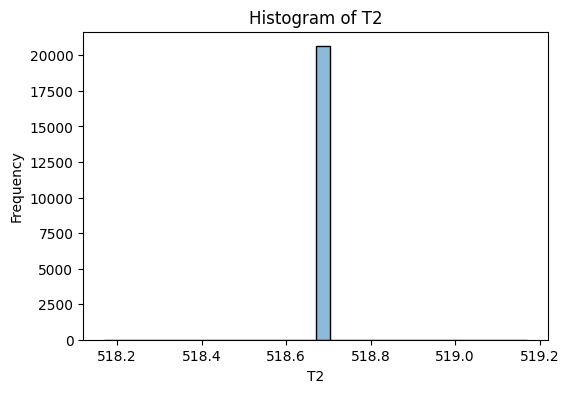

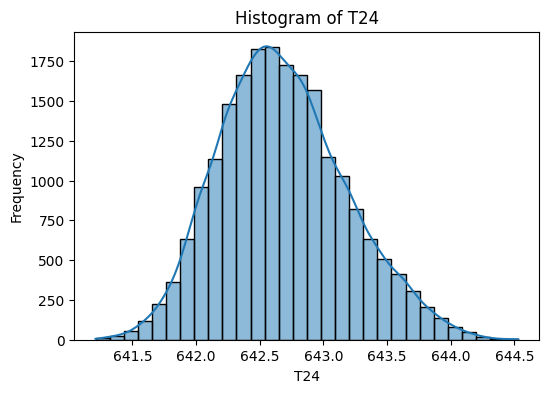

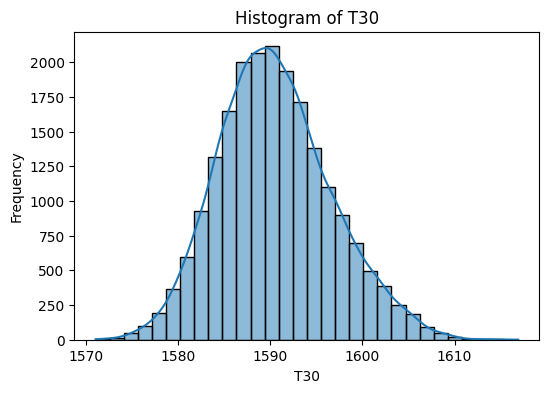

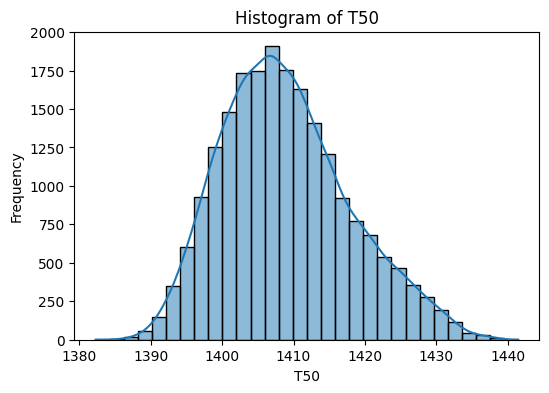

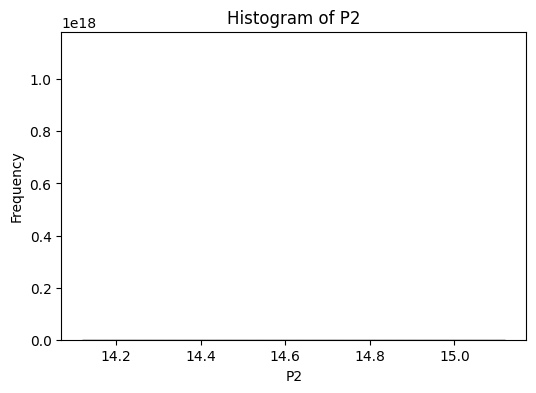

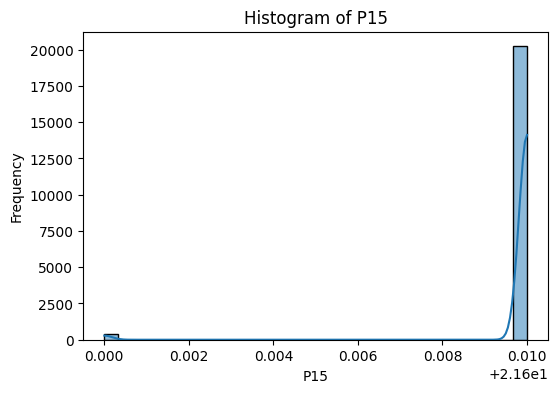

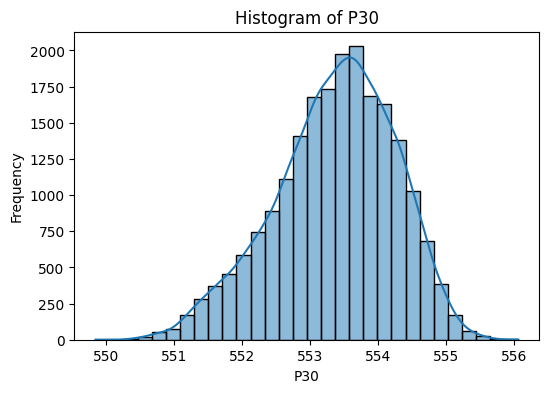

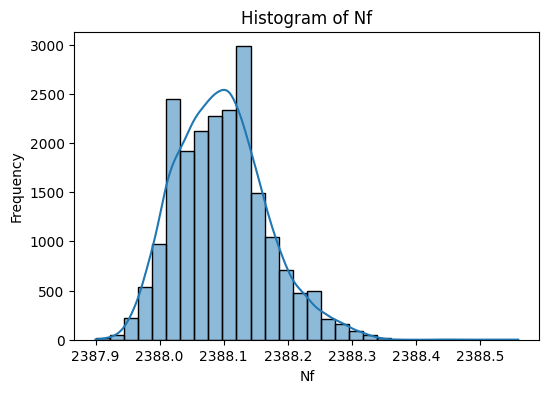

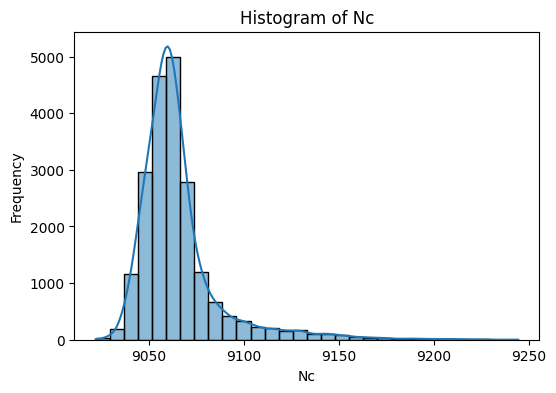

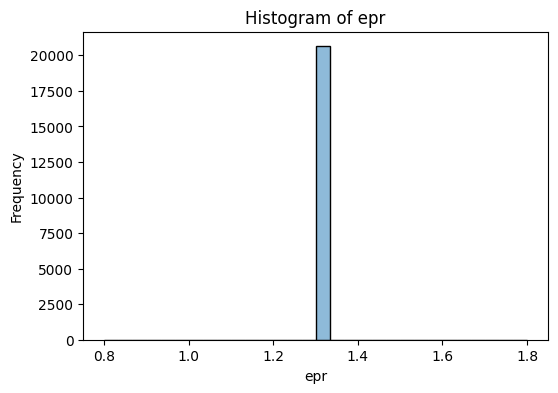

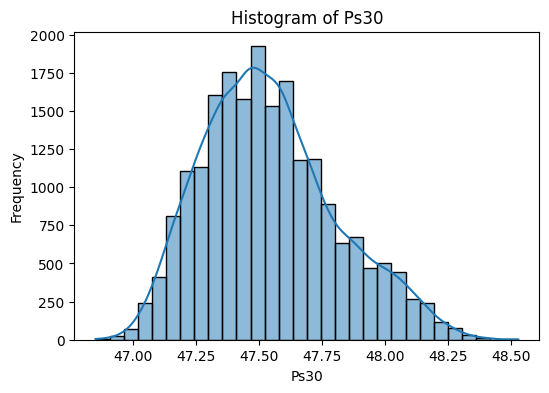

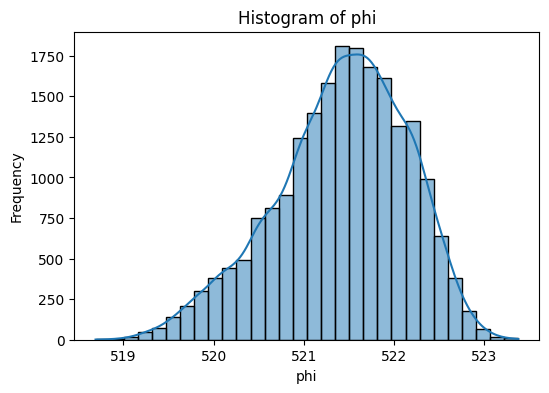

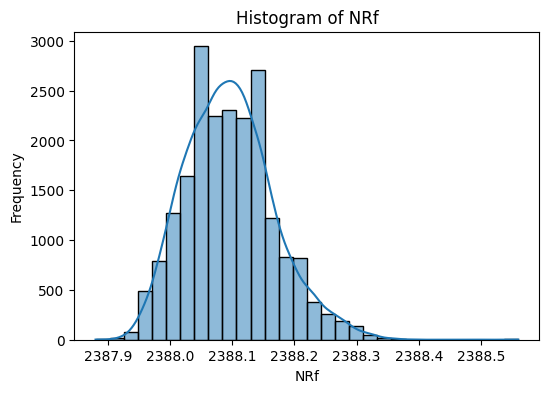

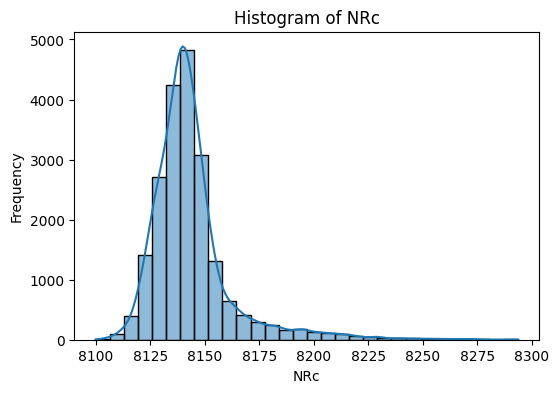

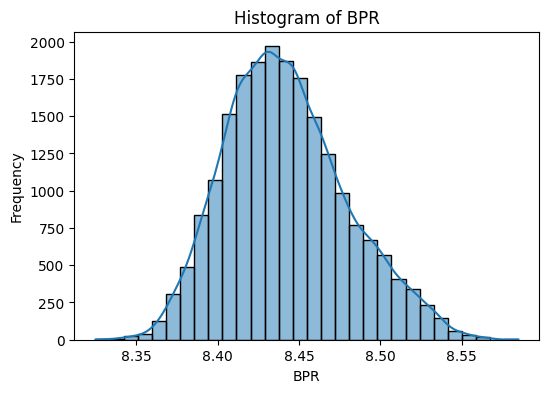

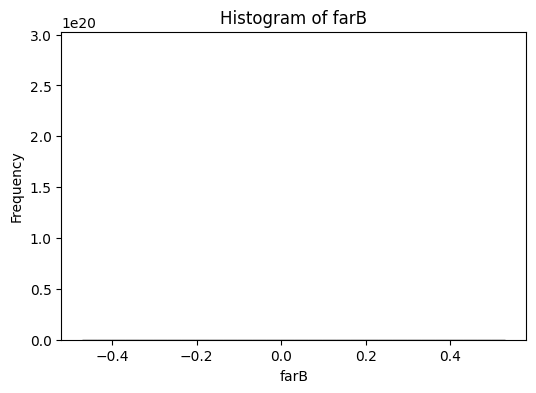

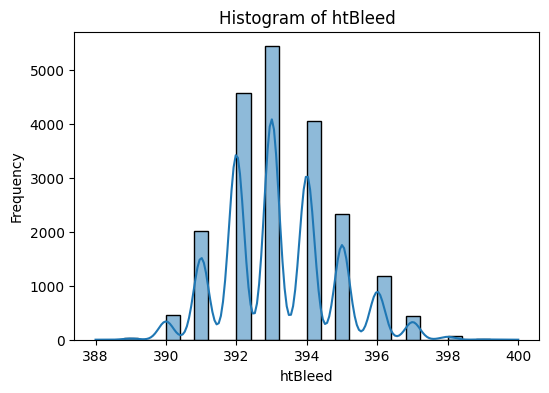

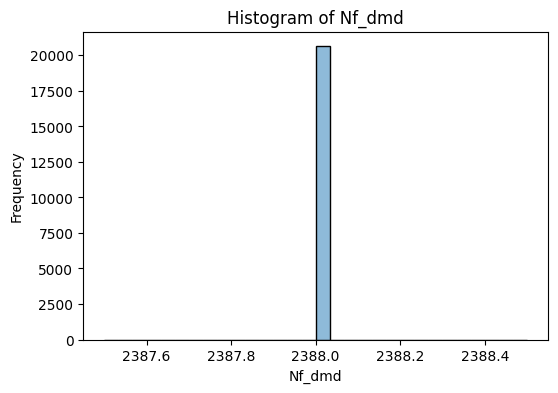

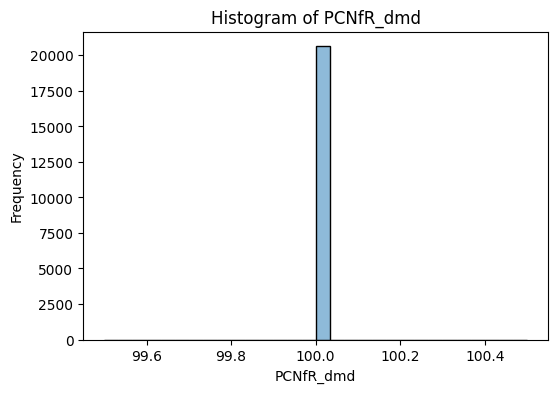

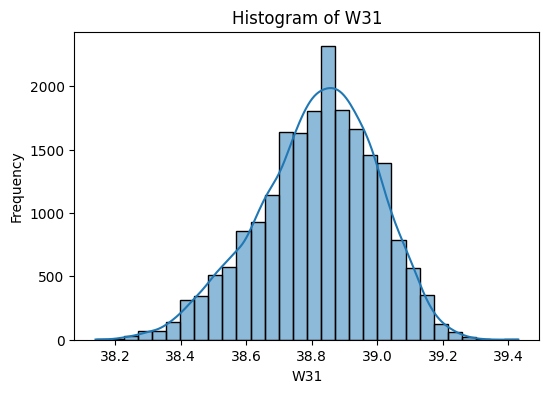

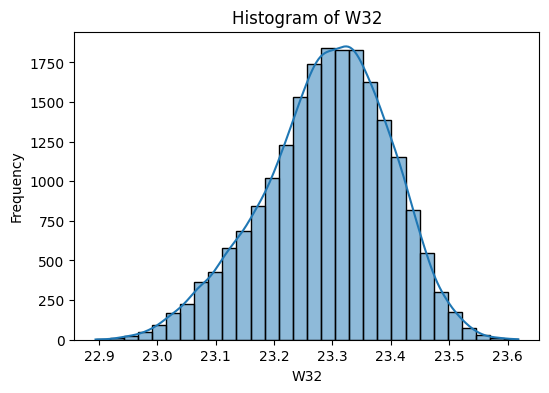

In [39]:
# Plot histograms for each column
for col in fd_001_train.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(fd_001_train[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


In [40]:
#delete columns with constant values ​​that do not carry information about the state of the unit
fd_001_train.drop(columns=['Nf_dmd','PCNfR_dmd','P2','T2','TRA','farB','epr'],inplace=True)

## We will display the mutual correlations of the signs on the "heat map", for this we will prepare an additional sign "RUL", showing the number of cycles to failure in the training data¶

# create a new column called remaining useful life

```python
fd_001_train['RUL'] = fd_001_train.groupby('unit_number')['time_in_cycles'].transform('max') - fd_001_train['time_in_cycles']
fd_001_train.head()```

## `groupby('unit_number')`
Groups the dataframe `fd_001_train` by the `unit_number` column.
Each unique `unit_number` represents a separate machine/unit.

## `['time_in_cycles']`
Selects the `time_in_cycles` column, which likely represents the operational cycles of each unit.

## `.transform('max')`
For each row, it computes the **maximum `time_in_cycles`** value within its respective `unit_number` group.

Unlike `.agg('max')`, which returns a reduced series, `.transform('max')` keeps the original number of rows.

Each row in the resulting series contains the maximum cycle count for its corresponding `unit_number`.




In [41]:
fd_001_train['life_ratio'] = fd_001_train['time_in_cycles'] / fd_001_train.groupby('unit_number')['time_in_cycles'].transform('max') 
fd_001_train

,unit_number,time_in_cycles,setting_1,setting_2,T24,T30,T50,P15,P30,Nf,Nc,Ps30,phi,NRf,NRc,BPR,htBleed,W31,W32,life_ratio
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,0.005208
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,0.010417
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,0.015625
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,0.020833
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,0.026042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,21.61,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,0.980000
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,21.61,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,0.985000
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,21.61,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,0.990000
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,21.61,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,0.995000


In [44]:
fd_001_train[fd_001_train['unit_number'] == 2]

,unit_number,time_in_cycles,setting_1,setting_2,T24,T30,T50,P15,P30,Nf,Nc,Ps30,phi,NRf,NRc,BPR,htBleed,W31,W32,life_ratio
192,2,1,-0.0018,0.0006,641.89,1583.84,1391.28,21.60,554.53,2388.01,9054.72,46.93,522.33,2388.06,8137.72,8.3905,391,38.94,23.4585,0.003484
193,2,2,0.0043,-0.0003,641.82,1587.05,1393.13,21.61,554.77,2387.98,9051.31,47.24,522.70,2387.98,8131.09,8.4167,392,39.06,23.4085,0.006969
194,2,3,0.0018,0.0003,641.55,1588.32,1398.96,21.60,555.14,2388.04,9054.24,47.22,522.58,2387.99,8140.58,8.3802,391,39.11,23.4250,0.010453
195,2,4,0.0035,-0.0004,641.68,1584.15,1396.08,21.61,554.25,2387.98,9058.01,47.10,522.49,2387.93,8140.44,8.4018,391,39.13,23.5027,0.013937
196,2,5,0.0005,0.0004,641.73,1579.03,1402.52,21.60,555.12,2388.03,9058.15,47.25,522.27,2387.94,8136.67,8.3867,390,39.18,23.4234,0.017422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,2,283,0.0046,0.0002,643.78,1602.03,1429.67,21.61,551.46,2388.16,9084.13,48.21,520.07,2388.20,8174.85,8.5199,398,38.42,23.0358,0.986063
475,2,284,-0.0006,0.0001,643.91,1601.35,1430.04,21.61,551.96,2388.22,9089.87,48.18,519.95,2388.21,8166.83,8.5291,395,38.23,23.1196,0.989547
476,2,285,-0.0007,0.0004,643.67,1596.84,1431.17,21.61,550.85,2388.20,9098.67,48.27,519.91,2388.22,8164.83,8.5242,396,38.39,23.1155,0.993031
477,2,286,-0.0010,-0.0003,643.44,1603.63,1429.57,21.61,551.61,2388.18,9102.01,48.14,519.51,2388.22,8169.97,8.4932,395,38.33,23.0169,0.996516


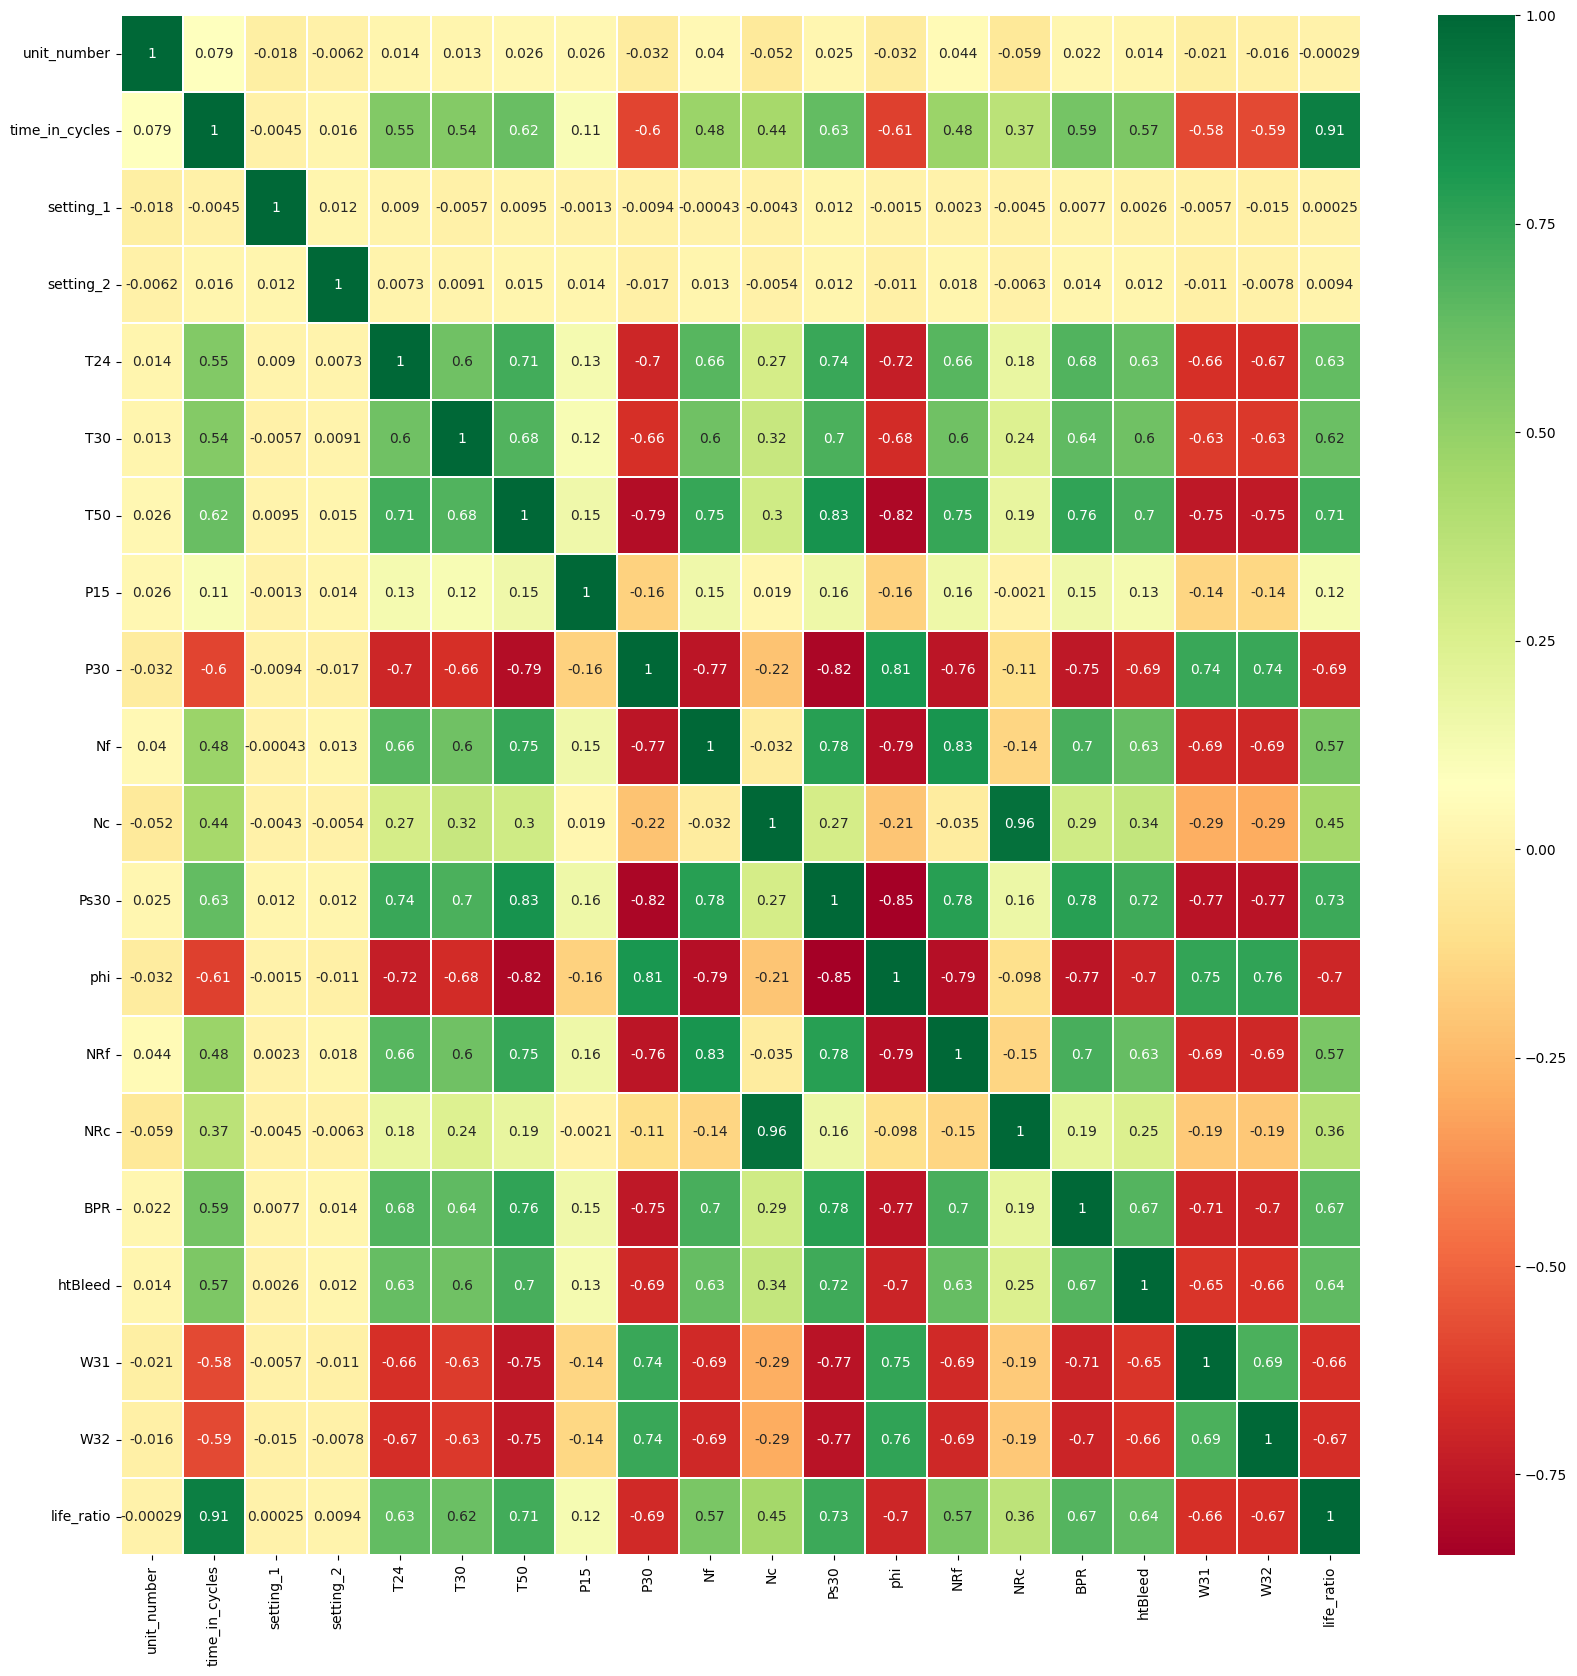

In [45]:
sns.heatmap(fd_001_train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [47]:
# Drop non-predictive columns
X = fd_001_train.drop(columns=['unit_number', 'setting_1', 'setting_2', 'life_ratio'])
y = fd_001_train['life_ratio']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [48]:
# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.0036294069131673013


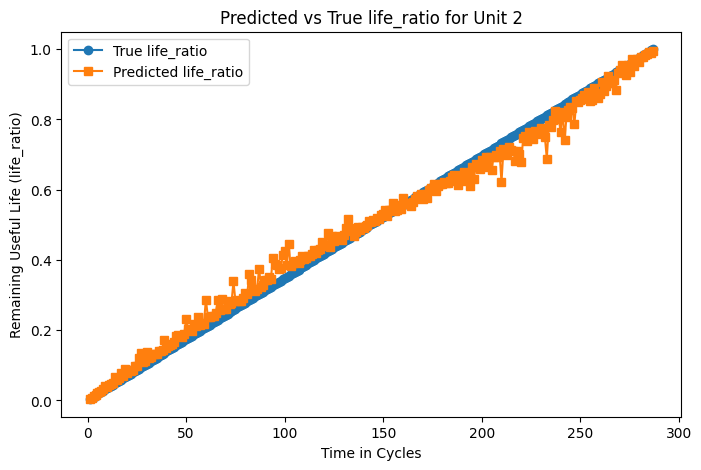

In [50]:
# Plot predicted vs true life_ratio for a specific unit_number
unit_id = fd_001_train['unit_number'].unique()[1]  # Select the first unit_number
unit_data = fd_001_train[fd_001_train['unit_number'] == unit_id]
true_life_ratio = unit_data['life_ratio']
pred_life_ratio = model.predict(unit_data.drop(columns=['unit_number', 'setting_1', 'setting_2', 'life_ratio']))

plt.figure(figsize=(8, 5))
plt.plot(unit_data['time_in_cycles'], true_life_ratio, label='True life_ratio', marker='o')
plt.plot(unit_data['time_in_cycles'], pred_life_ratio, label='Predicted life_ratio', marker='s')
plt.xlabel('Time in Cycles')
plt.ylabel('Remaining Useful Life (life_ratio)')
plt.title(f'Predicted vs True life_ratio for Unit {unit_id}')
plt.legend()
plt.show()

# Test on other datasets

In [51]:
fd_001_test_rul = pd.read_csv(r"C:\Users\User\Desktop\CMAPS_turbo_engine_RUL\CMAPSSData\RUL_FD001.txt",sep=" ",header=None)
fd_001_test_rul.drop(columns=[1],inplace=True)

eol = []
for un in fd_001_test['unit_number'].unique():
    temp_data = fd_001_test[fd_001_test['unit_number'] == un]
    eol_temp = fd_001_test_rul.iloc[un-1].values[0]
    eol_temp_list = [eol_temp for i in range(len(temp_data))]

    eol.extend(eol_temp_list)

In [53]:
fd_001_test = pd.read_csv(r"C:\Users\User\Desktop\CMAPS_turbo_engine_RUL\CMAPSSData\test_FD001.txt",sep=" ",header=None)
fd_001_test.drop(columns=[26,27],inplace=True)
columns = ['unit_number','time_in_cycles','setting_1','setting_2','TRA','T2','T24','T30','T50','P2','P15','P30','Nf',
           'Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32' ]

fd_001_test.columns = columns
fd_001_test.drop(columns=['Nf_dmd','PCNfR_dmd','P2','T2','TRA','farB','epr'],inplace=True)
fd_001_test['life_ratio'] = fd_001_test['time_in_cycles'].values / (fd_001_test.groupby('unit_number')['time_in_cycles'].transform('max').values + eol)  

fd_001_test.head()

,unit_number,time_in_cycles,setting_1,setting_2,T24,T30,T50,P15,P30,Nf,Nc,Ps30,phi,NRf,NRc,BPR,htBleed,W31,W32,life_ratio
0,1,1,0.0023,0.0003,643.02,1585.29,1398.21,21.61,553.90,2388.04,9050.17,47.20,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735,0.006993
1,1,2,-0.0027,-0.0003,641.71,1588.45,1395.42,21.61,554.85,2388.01,9054.42,47.50,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916,0.013986
2,1,3,0.0003,0.0001,642.46,1586.94,1401.34,21.61,554.11,2388.05,9056.96,47.50,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166,0.020979
3,1,4,0.0042,0.0000,642.44,1584.12,1406.42,21.61,554.07,2388.03,9045.29,47.28,521.38,2388.05,8132.90,8.3917,391,39.00,23.3737,0.027972
4,1,5,0.0014,0.0000,642.51,1587.19,1401.92,21.61,554.16,2388.01,9044.55,47.31,522.15,2388.03,8129.54,8.4031,390,38.99,23.4130,0.034965


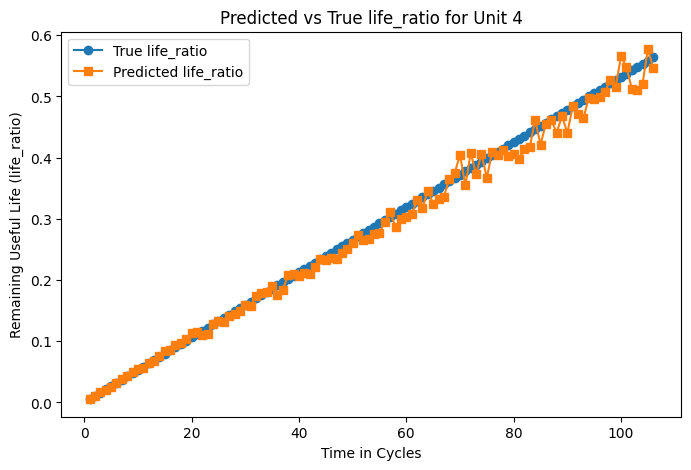

In [56]:
# Plot predicted vs true life_ratio for a specific unit_number
unit_id = fd_001_test['unit_number'].unique()[3]  # Select the first unit_number
unit_data = fd_001_test[fd_001_test['unit_number'] == unit_id]
true_life_ratio = unit_data['life_ratio']
pred_life_ratio = model.predict(unit_data.drop(columns=['unit_number', 'setting_1', 'setting_2', 'life_ratio']))

plt.figure(figsize=(8, 5))
plt.plot(unit_data['time_in_cycles'], true_life_ratio, label='True life_ratio', marker='o')
plt.plot(unit_data['time_in_cycles'], pred_life_ratio, label='Predicted life_ratio', marker='s')
plt.xlabel('Time in Cycles')
plt.ylabel('Remaining Useful Life (life_ratio)')
plt.title(f'Predicted vs True life_ratio for Unit {unit_id}')
plt.legend()
plt.show()

In [60]:
test_data_processed = []

for idx in range(1,5):

    test_data_life_ratio = pd.read_csv(rf"CMAPSSData\RUL_FD00{idx}.txt",sep=" ",header=None)
    test_data = pd.read_csv(rf"CMAPSSData\test_FD00{idx}.txt",sep=" ",header=None)


    test_data.drop(columns=[26,27],inplace=True)
    columns = ['unit_number','time_in_cycles','setting_1','setting_2','TRA','T2','T24','T30','T50','P2','P15','P30','Nf',
            'Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32' ]

    test_data.columns = columns
    test_data.drop(columns=['Nf_dmd','PCNfR_dmd','P2','T2','TRA','farB','epr'],inplace=True)

    eol = []
    for un in test_data['unit_number'].unique():
        temp_data = test_data[test_data['unit_number'] == un]
        eol_temp = test_data_life_ratio.iloc[un-1].values[0]
        eol_temp_list = [eol_temp for i in range(len(temp_data))]

        eol.extend(eol_temp_list)


    test_data['life_ratio'] = test_data['time_in_cycles'].values / (test_data.groupby('unit_number')['time_in_cycles'].transform('max').values + eol) 
    test_data.drop(columns=['unit_number', 'setting_1', 'setting_2'],inplace=True)

    test_data_processed.append(test_data)

    print(f"Processed test_FD00{idx}.txt, number of rows: {test_data.shape[0]}")
test_data_processed = pd.concat(test_data_processed, ignore_index=True)

X_test = test_data_processed.drop(columns=['life_ratio'])
y_test = test_data_processed['life_ratio']

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Processed test_FD001.txt, number of rows: 13096
Processed test_FD002.txt, number of rows: 33991
Processed test_FD003.txt, number of rows: 16596
Processed test_FD004.txt, number of rows: 41214
Mean Squared Error: 0.00957350191017222
